<a href="https://colab.research.google.com/github/cimbelli/LAU/blob/main/DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and check LAU files (nomenclature and boundaries) for France

In [ ]:
### IMPORT LIBRARIES

#!pip install odfpy
#!pip install geopandas
import pandas as pd
#import geopandas as gpd
import os
import zipfile
import glob

year = 2022

#c = pd.read_csv("countries.csv")

In [ ]:
### FILES URL

nomenclature_file = 'https://www.insee.fr/fr/statistiques/fichier/6051727/commune_' + str(year) + '.csv'
nomenclature_code_field = 'NCCENR'
nomenclature_name_field = 'COD'


#boundaries_file = 'https://data.statistik.gv.at/data/OGDEXT_GEM_1_STATISTIK_AUSTRIA_' + str(year) + '0101.zip' #20230101.zip'
#boundaries_code_field = 'g_id'
#boundaries_name_field = 'g_name'


In [ ]:
### FILES DOWNLOAD and TRANSFORM

# Nomenclature LAU file
nomenclature_filename = os.path.basename(nomenclature_file)
if not os.path.isfile(nomenclature_filename):
  !wget $nomenclature_file
nomenclature = pd.read_csv(nomenclature_filename, skiprows=1).dropna()
#nomenclature[nomenclature_code_field] = nomenclature[nomenclature_code_field].astype(int)





In [ ]:
nomenclature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 4598 to 4613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COM                      16 non-null     object 
 1   01001                    16 non-null     object 
 2   84                       16 non-null     float64
 3   01                       16 non-null     object 
 4   01D                      16 non-null     object 
 5   012                      16 non-null     object 
 6   5                        16 non-null     int64  
 7   ABERGEMENT CLEMENCIAT    16 non-null     object 
 8   Abergement-Clémenciat    16 non-null     object 
 9   L'Abergement-Clémenciat  16 non-null     object 
 10  0108                     16 non-null     object 
 11  Unnamed: 11              16 non-null     float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.6+ KB


In [ ]:
attr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   g_id      2115 non-null   int64   
 1   g_name    2115 non-null   object  
 2   geometry  2115 non-null   geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 49.7+ KB


In [ ]:
### Records missed in boundaries

m1 = pd.merge(nomenclature, attr,how='left',left_on=nomenclature_code_field, right_on=boundaries_code_field)
err_m1 = m1.loc[m1.NAME!=m1.g_name]

print(len(err_m1),"records present in nomenclature file and missing in boundaries")
err_m1

1 records present in nomenclature file and missing in boundaries


,GKZ,GEMNR,NAME,g_id,g_name,geometry
2092,90001,90001,Wien,NaN,NaN,None


In [ ]:
### Records missed in nomenclature

m2 = pd.merge(nomenclature, attr,how='right',left_on=nomenclature_code_field, right_on=boundaries_code_field)
err_m2 = m2.loc[m2.NAME!=m2.g_name]

print(len(err_m2),"records present in boundaries' file and missing in nomenclature")
err_m2

0 records present in boundaries' file and missing in nomenclature


,GKZ,GEMNR,NAME,g_id,g_name,geometry


<Axes: >

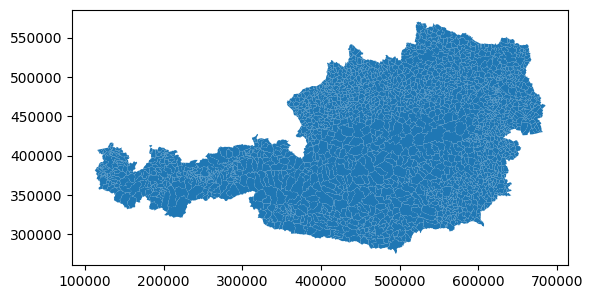

In [ ]:
attr.plot()